<a href="https://colab.research.google.com/github/Omoadonibetty/Hamoye_Internship/blob/main/STAGE_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all neccesary Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [10]:
#reading the dataset
df = pd.read_csv('household_power_consumption.txt', delimiter=';')

In [11]:
#check for the columns
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [12]:
#check for the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377022 entries, 0 to 377021
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   377022 non-null  object 
 1   Time                   377021 non-null  object 
 2   Global_active_power    377021 non-null  object 
 3   Global_reactive_power  377021 non-null  object 
 4   Voltage                377021 non-null  object 
 5   Global_intensity       377021 non-null  object 
 6   Sub_metering_1         377021 non-null  object 
 7   Sub_metering_2         377021 non-null  object 
 8   Sub_metering_3         373093 non-null  float64
dtypes: float64(1), object(8)
memory usage: 25.9+ MB


In [13]:
#checking for null values
df.isnull().sum()

Date                        0
Time                        1
Global_active_power         1
Global_reactive_power       1
Voltage                     1
Global_intensity            1
Sub_metering_1              1
Sub_metering_2              1
Sub_metering_3           3929
dtype: int64

In [14]:
#dropping the null values
df.dropna(inplace=True)
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

In [16]:
daily_data = df.groupby('Date').agg({'Global_active_power': 'sum'}).reset_index()
daily_data.columns = ['ds', 'y']

total_days = daily_data.shape[0]

train_size = total_days - 300
train_data = daily_data.iloc[:train_size]
test_data = daily_data.iloc[train_size:]

In [17]:
#  Inspect the train_data DataFrame
print(train_data.head())
print(train_data.info())

#  Check for NaN values and handle them
#  Drop rows with NaN values
train_data = train_data.dropna()

# Verify the data
print(train_data.head())
print(train_data.info())

# Ensure there are at least two non-NaN rows
if train_data.shape[0] < 2:
    raise ValueError('Insufficient data after handling NaN values.')

#  Fit the model
model = Prophet(daily_seasonality=True)
model.fit(train_data)

#  Create future dates and make predictions
future_dates = model.make_future_dataframe(periods=300)
forecast = model.predict(future_dates)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpolj55rpb/0g0b0bd7.json


          ds         y
0 2006-12-16  1209.176
1 2006-12-17  3390.460
2 2006-12-18  2203.826
3 2006-12-19  1666.194
4 2006-12-20  2225.748
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      224 non-null    datetime64[ns]
 1   y       224 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.6 KB
None
          ds         y
0 2006-12-16  1209.176
1 2006-12-17  3390.460
2 2006-12-18  2203.826
3 2006-12-19  1666.194
4 2006-12-20  2225.748
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      224 non-null    datetime64[ns]
 1   y       224 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.6 KB
None


DEBUG:cmdstanpy:input tempfile: /tmp/tmpolj55rpb/v5agamxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85507', 'data', 'file=/tmp/tmpolj55rpb/0g0b0bd7.json', 'init=/tmp/tmpolj55rpb/v5agamxq.json', 'output', 'file=/tmp/tmpolj55rpb/prophet_model018qau5q/prophet_model-20240617211824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:18:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds         yhat   yhat_lower  yhat_upper
519 2008-05-19 -1398.132126 -2148.166724 -633.898961
520 2008-05-20 -1538.754393 -2331.523502 -680.917069
521 2008-05-21 -1317.650464 -2121.243573 -508.806271
522 2008-05-22 -1484.429446 -2251.026982 -662.547644
523 2008-05-23 -1539.917154 -2318.477296 -772.702952


In [18]:
model = Prophet(daily_seasonality=True)
model.fit(train_data)

future_dates = model.make_future_dataframe(periods=300)

forecast = model.predict(future_dates)

forecast_test = forecast[['ds', 'yhat']].tail(300)

test_data = test_data.merge(forecast_test, on='ds')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpolj55rpb/ph8p3295.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpolj55rpb/sn_5406p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90754', 'data', 'file=/tmp/tmpolj55rpb/ph8p3295.json', 'init=/tmp/tmpolj55rpb/sn_5406p.json', 'output', 'file=/tmp/tmpolj55rpb/prophet_modelvt3vmog3/prophet_model-20240617211825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
mae = mean_absolute_error(test_data['y'], test_data['yhat'])
rmse = np.sqrt(mean_squared_error(test_data['y'], test_data['yhat']))
mape = mean_absolute_percentage_error(test_data['y'], test_data['yhat']) * 100

display("MAE:", mae)
display("RMSE:", rmse)
display("MAPE:", round(mape, 2))

'MAE:'

497.7111582625885

'RMSE:'

569.3465237803383

'MAPE:'

53.94

Day of the weekly seasonality with the lowest value: 2


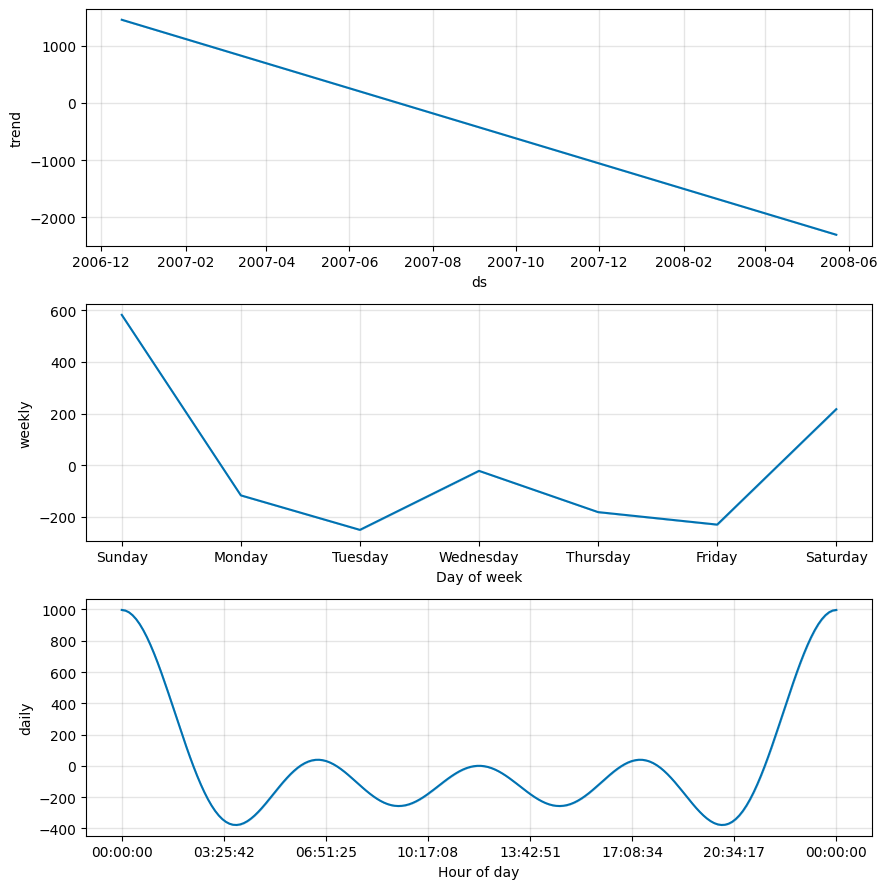

In [20]:
fig = model.plot_components(forecast)

axes = fig.get_axes()[1]

min_value = np.min(axes.lines[0].get_ydata())
min_day_index = np.argmin(axes.lines[0].get_ydata())

min_day = axes.get_xticks()[min_day_index]

print("Day of the weekly seasonality with the lowest value:", min_day)

In [21]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373093 entries, 0 to 377020
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   373093 non-null  datetime64[ns]
 1   Time                   373093 non-null  object        
 2   Global_active_power    373093 non-null  float64       
 3   Global_reactive_power  373093 non-null  object        
 4   Voltage                373093 non-null  object        
 5   Global_intensity       373093 non-null  object        
 6   Sub_metering_1         373093 non-null  object        
 7   Sub_metering_2         373093 non-null  object        
 8   Sub_metering_3         373093 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 28.5+ MB


In [45]:
df.duplicated()

DateTime
2006-12-16 17:24:00    False
2006-12-16 17:25:00    False
2006-12-16 17:26:00    False
2006-12-16 17:27:00    False
2006-12-16 17:28:00    False
                       ...  
2007-09-04 13:00:00    False
2007-09-04 13:01:00    False
2007-09-04 13:02:00    False
2007-09-04 13:03:00    False
2007-09-04 13:04:00    False
Length: 373093, dtype: bool

In [47]:
df.shape

(373093, 9)

In [48]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [49]:
df.describe()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,373093,373093.000000,373093.000000,373093.000000,373093.000000,373093.000000,373093.000000,373093.000000
mean,2007-04-26 01:42:43.207564544,1.098677,0.123785,239.012341,4.704385,1.226992,1.576741,5.548204
min,2006-12-16 00:00:00,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,2007-02-19 00:00:00,0.266000,0.000000,236.330000,1.200000,0.000000,0.000000,0.000000
50%,2007-04-25 00:00:00,0.472000,0.106000,239.410000,2.200000,0.000000,0.000000,0.000000
75%,2007-07-01 00:00:00,1.526000,0.194000,241.660000,6.400000,0.000000,1.000000,17.000000
max,2007-09-04 00:00:00,10.670000,1.148000,251.700000,46.400000,78.000000,78.000000,20.000000
std,NaN,1.160628,0.110913,3.669986,4.900087,6.446965,6.468195,8.073037


In [23]:
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373093 entries, 0 to 377020
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   373093 non-null  datetime64[ns]
 1   Time                   373093 non-null  object        
 2   Global_active_power    373093 non-null  float64       
 3   Global_reactive_power  373093 non-null  float64       
 4   Voltage                373093 non-null  float64       
 5   Global_intensity       373093 non-null  float64       
 6   Sub_metering_1         373093 non-null  float64       
 7   Sub_metering_2         373093 non-null  float64       
 8   Sub_metering_3         373093 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 28.5+ MB


In [25]:
daily_data = df.groupby('Date').agg({
    'Global_active_power': 'sum',
    'Global_reactive_power': 'sum',
    'Voltage': 'mean',
    'Global_intensity': 'sum',
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum'
}).reset_index()

daily_data.columns = ['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']

In [50]:
df.corr()

ValueError: could not convert string to float: '17:24:00'

In [43]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

correlation = df['Global_active_power'].corr(df['Voltage'])

In [38]:
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

correlation = df['Global_intensity'].corr(df['Voltage'])

In [42]:
correlation

-0.311161480840484

In [26]:
total_days = daily_data.shape[0]

train_size = total_days - 300
train_data = daily_data.iloc[:train_size]
test_data = daily_data.iloc[train_size:]

In [27]:
model = Prophet(daily_seasonality=True)

regressors = ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']
for regressor in regressors:
    model.add_regressor(regressor)

model.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpolj55rpb/q9rdmkfc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpolj55rpb/s72joex4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97559', 'data', 'file=/tmp/tmpolj55rpb/q9rdmkfc.json', 'init=/tmp/tmpolj55rpb/s72joex4.json', 'output', 'file=/tmp/tmpolj55rpb/prophet_modelj0d57n5v/prophet_model-20240617211830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:18:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


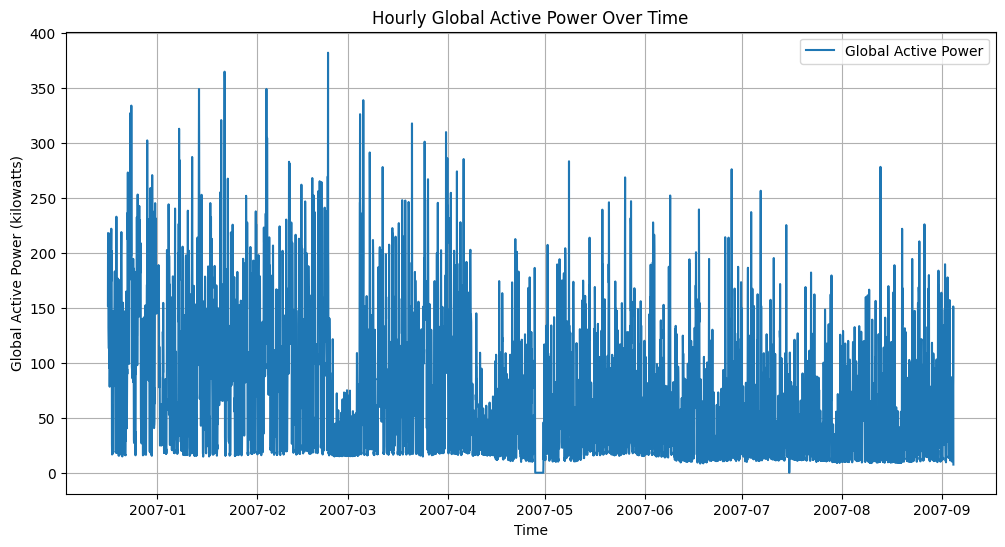

In [34]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df.set_index('DateTime', inplace=True)

cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.ffill(inplace=True)

hourly_df = df.resample('H').sum()

plt.figure(figsize=(12, 6))
plt.plot(hourly_df.index, hourly_df['Global_active_power'], label='Global Active Power')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Hourly Global Active Power Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
future_dates = model.make_future_dataframe(periods=300)

future_dates = future_dates.merge(daily_data[['ds'] + regressors], on='ds', how='left')

future_dates.fillna(method='ffill', inplace=True)

forecast = model.predict(future_dates)

forecast_test = forecast[['ds', 'yhat']].tail(300)

test_data = test_data.merge(forecast_test, on='ds')

In [29]:
mae = mean_absolute_error(test_data['y'], test_data['yhat'])
rmse = np.sqrt(mean_squared_error(test_data['y'], test_data['yhat']))
mape = mean_absolute_percentage_error(test_data['y'], test_data['yhat']) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print("MAPE:", round(mape, 2))

MAE: 12.056444793316516
RMSE: 13.953171015949238
MAPE: 1.27


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpolj55rpb/vl775srf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpolj55rpb/qophrmhf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48097', 'data', 'file=/tmp/tmpolj55rpb/vl775srf.json', 'init=/tmp/tmpolj55rpb/qophrmhf.json', 'output', 'file=/tmp/tmpolj55rpb/prophet_modelrwp2ckth/prophet_model-20240617212645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:26:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:26:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Day of the daily seasonality with the lowest value: 2006-12-16 00:00:00


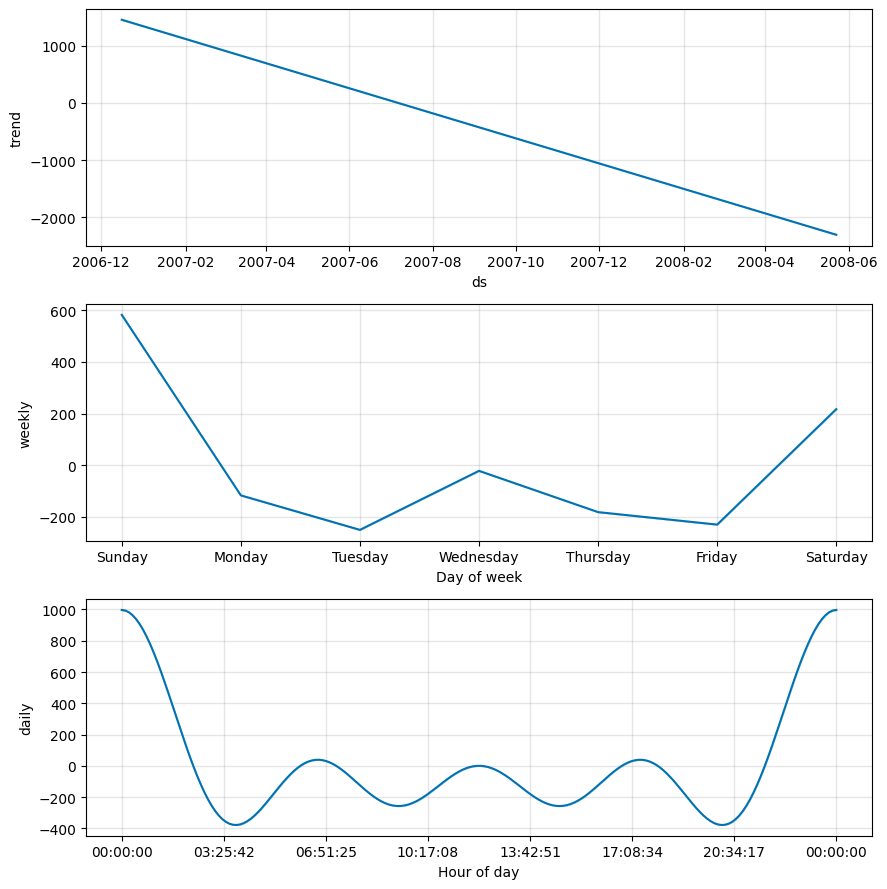

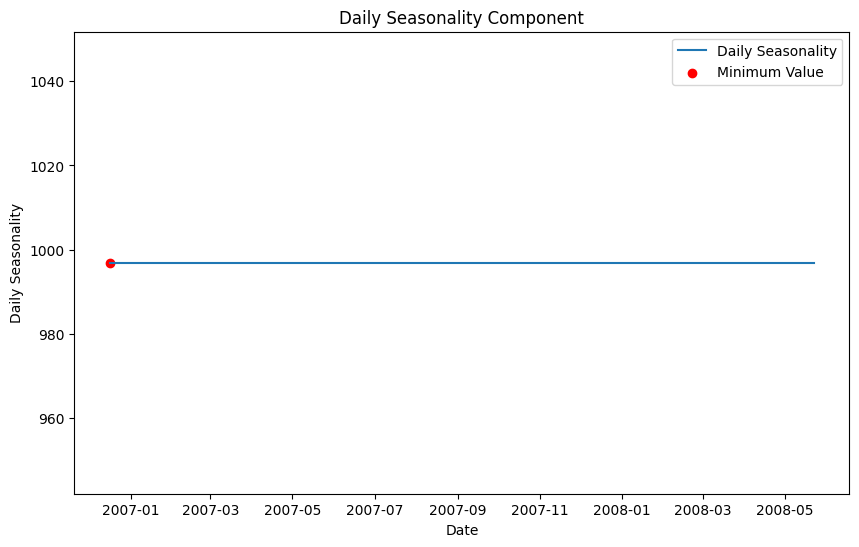

In [33]:

# Assuming `train_data` is your training DataFrame with 'ds' and 'y' columns
# Example of loading the data (replace this with your actual data loading)
# train_data = pd.read_csv('your_data.csv')

# Fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(train_data)

# Generate future dates (assuming you want to forecast 300 days into the future)
future_dates = model.make_future_dataframe(periods=300)
forecast = model.predict(future_dates)

# Plot the components of the forecast
fig = model.plot_components(forecast)

# Access the daily seasonality component data
daily_seasonality = forecast[['ds', 'daily']]

# Find the minimum value in the daily seasonality component
min_value = daily_seasonality['daily'].min()
min_day_index = daily_seasonality['daily'].idxmin()
min_day = daily_seasonality.loc[min_day_index, 'ds']

print(f"Day of the daily seasonality with the lowest value: {min_day}")

# Plot the daily seasonality component with the minimum value highlighted
plt.figure(figsize=(10, 6))
plt.plot(daily_seasonality['ds'], daily_seasonality['daily'], label='Daily Seasonality')
plt.scatter(min_day, min_value, color='red', label='Minimum Value')
plt.xlabel('Date')
plt.ylabel('Daily Seasonality')
plt.title('Daily Seasonality Component')
plt.legend()
plt.show()